In [ ]:
# Importing the Python libraries we'll need
import pandas as pd          # for handling tabular data
import numpy as np           # for numerical calculations
import matplotlib.pyplot as plt  # for creating basic plots
import seaborn as sns        # for prettier charts

# Set a nice visual style for all plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)


In [12]:
# Load the dataset 
df = pd.read_csv("Zomato data .csv")


df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [15]:
# Check column names, datatypes, and nulls
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Restaurant    148 non-null    object 
 1   Online_Order  148 non-null    object 
 2   Book_Table    148 non-null    object 
 3   Rating        148 non-null    float64
 4   Votes         148 non-null    int64  
 5   Cost_for_Two  148 non-null    float64
 6   Type          148 non-null    object 
dtypes: float64(2), int64(1), object(4)
memory usage: 8.2+ KB


In [16]:
# Quick stats for numeric columns like votes and cost
df.describe()

,Rating,Votes,Cost_for_Two
count,148.000000,148.000000,148.000000
mean,3.633108,264.810811,418.243243
std,0.402271,653.676951,223.085098
min,2.600000,0.000000,100.000000
25%,3.300000,6.750000,200.000000
50%,3.700000,43.500000,400.000000
75%,3.900000,221.750000,600.000000
max,4.600000,4884.000000,950.000000


In [17]:
# Rename columns to simpler names for easier typing
df.rename(columns={
    'name': 'Restaurant',
    'rate': 'Rating',
    'votes': 'Votes',
    'online_order': 'Online_Order',
    'book_table': 'Book_Table',
    'approx_cost(for two people)': 'Cost_for_Two',
    'listed_in(type)': 'Type'
}, inplace=True)

In [ ]:
# Handle missing or malformed ratings like 'NEW' or '-'

df = df[df['Rating'].notnull()]

df = df[~df['Rating'].isin(['NEW', '-'])]

In [ ]:
# Clean and convert ratings to numeric

df['Rating'] = df['Rating'].apply(lambda x: float(str(x).split('/')[0]))

In [ ]:
# Clean Cost column and convert to float

df['Cost_for_Two'] = df['Cost_for_Two'].astype(str).str.replace(',', '')

df['Cost_for_Two'] = df['Cost_for_Two'].astype(float)


In [18]:
df.head()

,Restaurant,Online_Order,Book_Table,Rating,Votes,Cost_for_Two,Type
0,Jalsa,Yes,Yes,4.1,775,800.0,Buffet
1,Spice Elephant,Yes,No,4.1,787,800.0,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800.0,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300.0,Buffet
4,Grand Village,No,No,3.8,166,600.0,Buffet


Q1: What type of restaurant do the majority of customers order from?

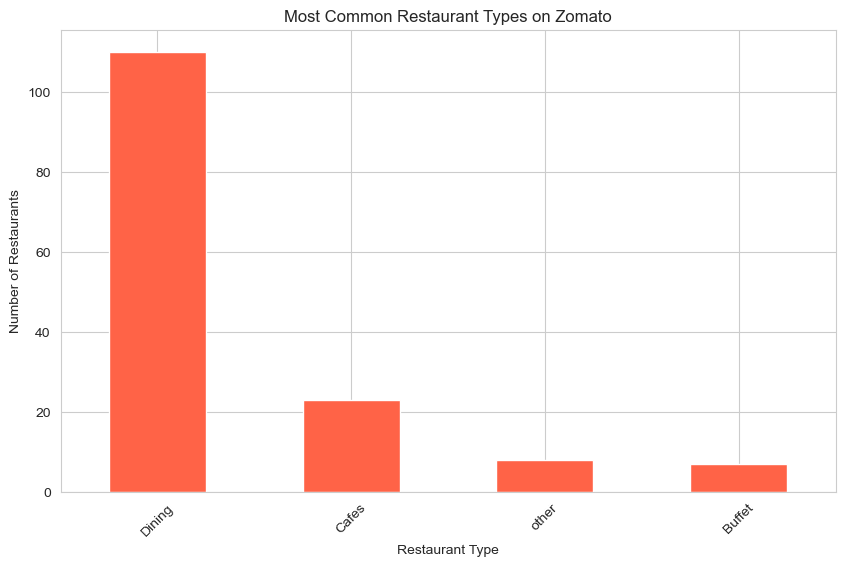

In [19]:
# Count the number of restaurants by type (like Buffet, Delivery, etc.)

df['Type'].value_counts().head(10).plot(kind='bar', color='tomato')

plt.title('Most Common Restaurant Types on Zomato')

plt.xlabel('Restaurant Type')

plt.ylabel('Number of Restaurants')

plt.xticks(rotation=45)

plt.show()


Q2: How many votes has each type of restaurant received?

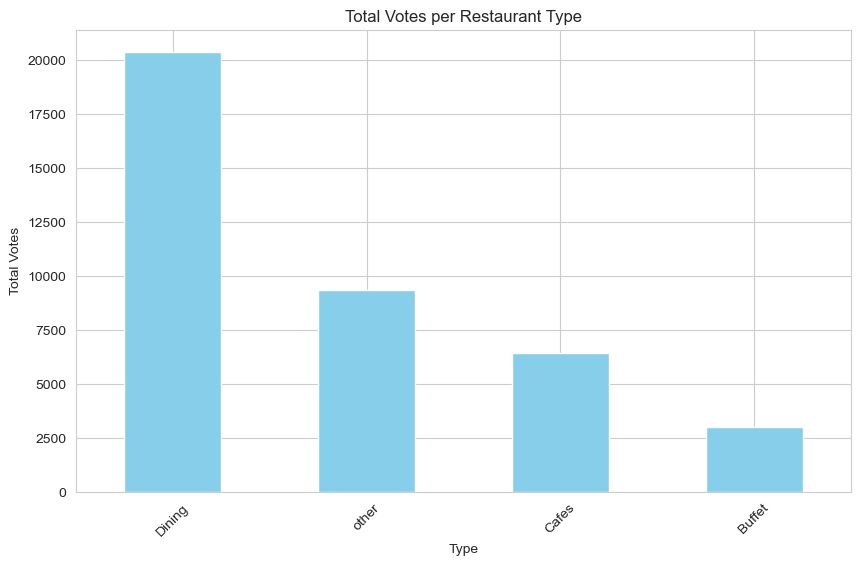

In [20]:
# Group by restaurant type and sum the votes

votes_by_type = df.groupby('Type')['Votes'].sum().sort_values(ascending=False).head(10)

votes_by_type.plot(kind='bar', color='skyblue')

plt.title('Total Votes per Restaurant Type')

plt.xlabel('Type')

plt.ylabel('Total Votes')

plt.xticks(rotation=45)

plt.show()

Q3: What are the ratings that the majority of restaurants have received?

C:\Users\icon\AppData\Local\Temp\ipykernel_16004\1867590139.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=rounded_ratings, palette='Set2')


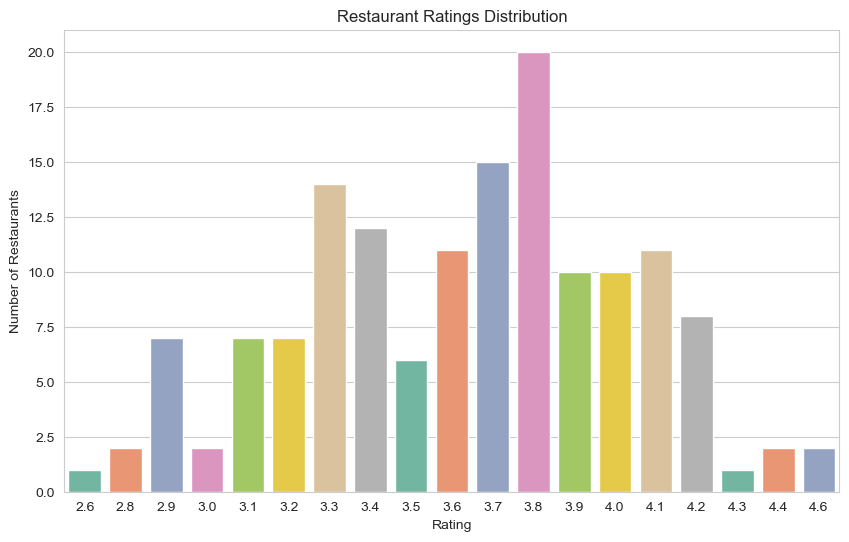

In [21]:
# Count the number of restaurants for each rating 

rounded_ratings = df['Rating'].round(1)

sns.countplot(x=rounded_ratings, palette='Set2')

plt.title('Restaurant Ratings Distribution')

plt.xlabel('Rating')

plt.ylabel('Number of Restaurants')

plt.show()

Q4: What is the average spending per couple (Cost for Two)?

In [22]:
# Since Zomato says couples mostly order online, let's check their average spending

online_couples = df[df['Online_Order'] == 'Yes']

avg_spending = online_couples['Cost_for_Two'].mean()

print(f" On average, a couple spends ₹{avg_spending:.2f} per online food order.")


 On average, a couple spends ₹510.34 per online food order.


Q5: Which mode (online or offline) has received the maximum rating?

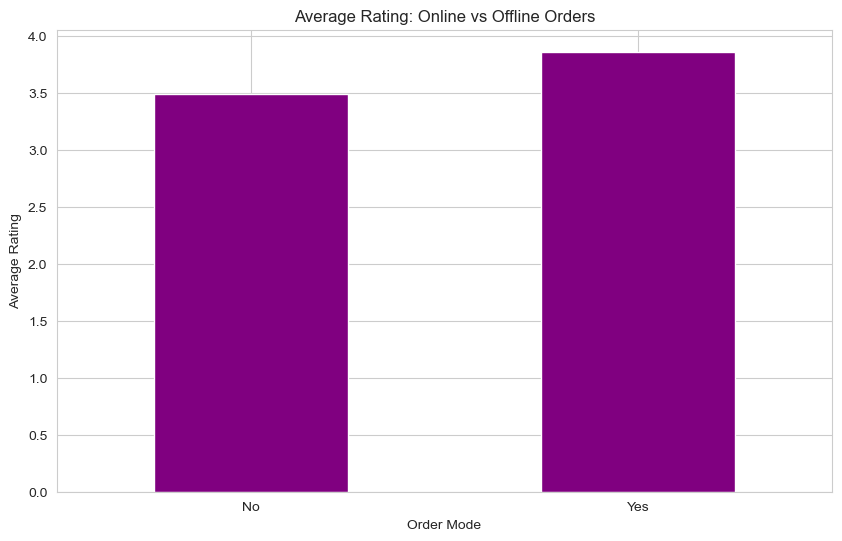

In [23]:
# Group by online/offline and take average rating
rating_by_mode = df.groupby('Online_Order')['Rating'].mean()

rating_by_mode.plot(kind='bar', color='purple')

plt.title('Average Rating: Online vs Offline Orders')

plt.xlabel('Order Mode')

plt.ylabel('Average Rating')

plt.xticks(rotation=0)

plt.show()

Q6: Which type of restaurant received more offline orders?

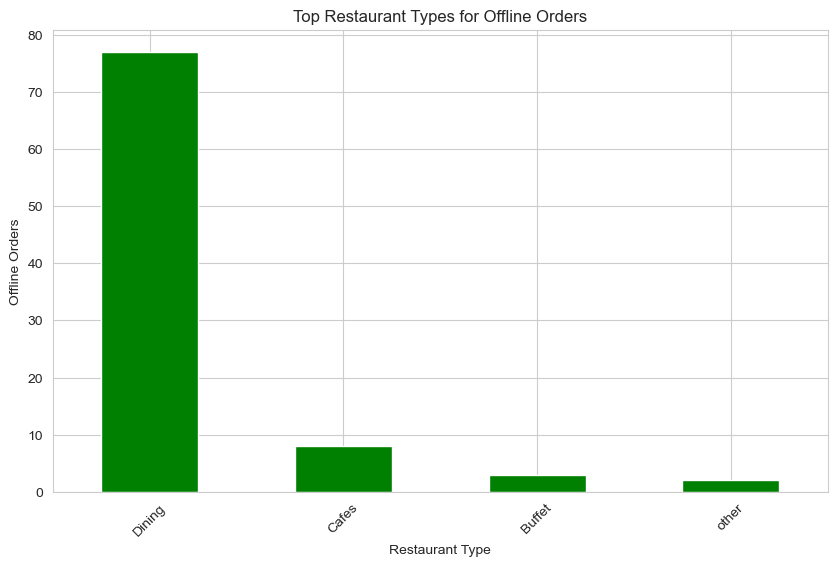

In [24]:
# Filter only offline orders
offline_restaurants = df[df['Online_Order'] == 'No']

# Count the restaurant types among offline orders
offline_types = offline_restaurants['Type'].value_counts().head(10)

offline_types.plot(kind='bar', color='green')

plt.title('Top Restaurant Types for Offline Orders')

plt.xlabel('Restaurant Type')

plt.ylabel('Offline Orders')

plt.xticks(rotation=45)

plt.show()